In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)

model_config = config["model"]
data_config = config["data"]
path_config = config["paths"]

In [2]:
# Load data
from src.data_loader import load_anime_dataset
ratings, anime = load_anime_dataset()

from src.utils import preprocess_data
user_anime, ratings = preprocess_data(ratings, min_likes_user=data_config["min_likes_user"], min_likes_anime=data_config["min_likes_anime"])
print("user_anime shape:", user_anime.shape)
print("Ratings shape:", ratings.shape)
print(ratings.head())
print("Anime shape:", anime.shape)
print(anime.head())

/home/tun/projects/anime-recommendation/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


user_anime shape: (1922, 12347)
Ratings shape: (855449, 6)
         user_id  anime_id  score     status  episodes_seen  liked
146      Hamilho     52991   10.0  Completed           28.0      1
197  farhantwoo_     52991   10.0  Completed           28.0      1
213  RiasReverie     52991   10.0  Completed           28.0      1
243    chefconke     52991   10.0  Completed           28.0      1
261    dragonnir     52991   10.0  Completed           28.0      1
Anime shape: (26896, 18)
   anime_id                                name  \
0     52991                   Sousou no Frieren   
1      5114    Fullmetal Alchemist: Brotherhood   
2      9253                         Steins;Gate   
3     38524  Shingeki no Kyojin Season 3 Part 2   
4     28977                            Gintama°   

                      title_english              title_japanese type  \
0     Frieren: Beyond Journey's End                    葬送のフリーレン   TV   
1  Fullmetal Alchemist: Brotherhood  鋼の錬金術師 FULLMETAL ALCHEMIST

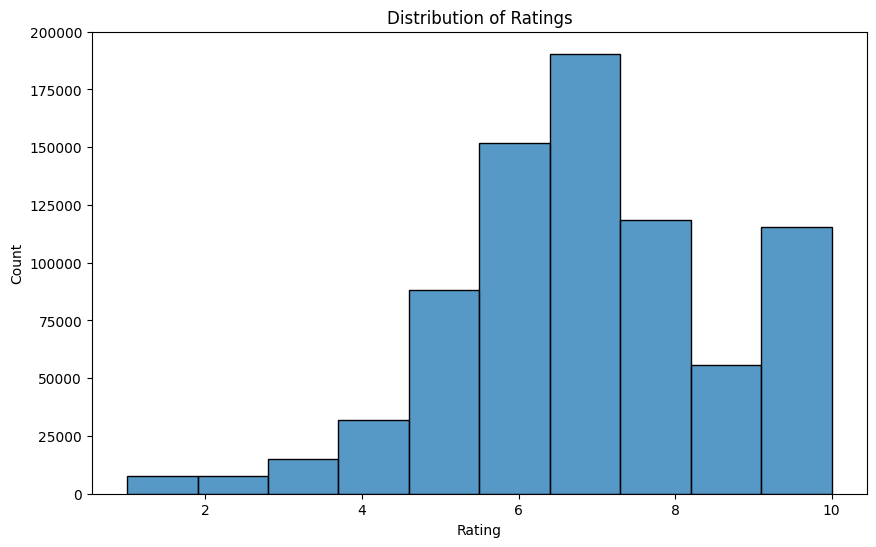

In [3]:
# Ratings distribution
plt.figure(figsize=(10, 6))
sns.histplot(ratings['score'], bins=10, kde=False)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

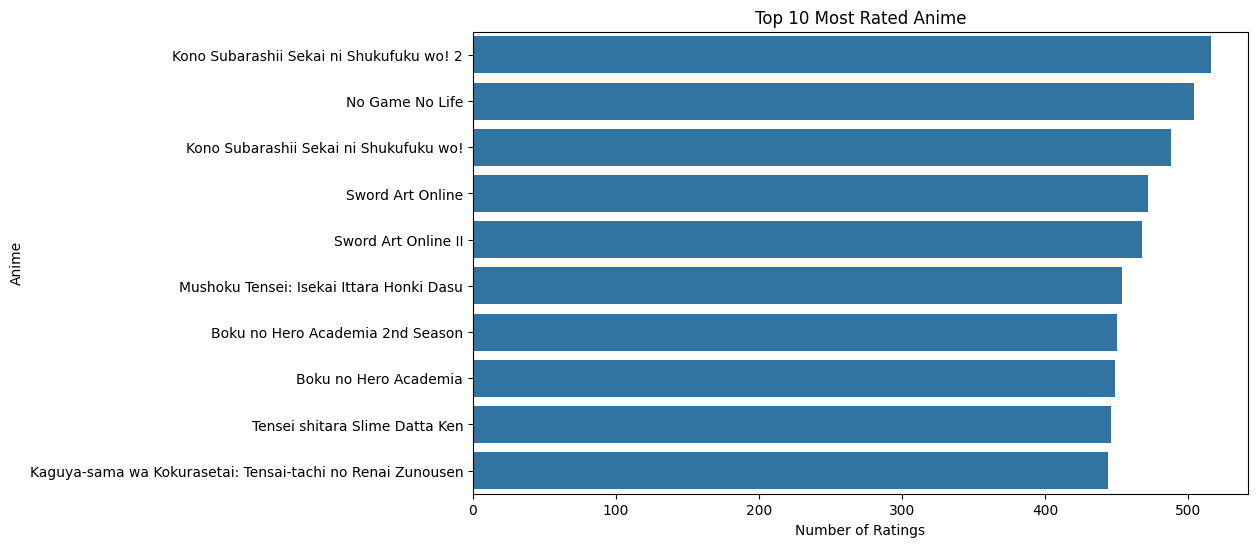

In [4]:
# top 10 most rated anime
anime_counts = ratings['anime_id'].value_counts().head(10)
top_anime = anime[anime['anime_id'].isin(anime_counts.index)]
top_anime = top_anime.set_index('anime_id').loc[anime_counts.index]
top_anime['num_ratings'] = anime_counts.values

plt.figure(figsize=(10, 6))
sns.barplot(data=top_anime, x='num_ratings', y='name')
plt.title("Top 10 Most Rated Anime")
plt.xlabel("Number of Ratings")
plt.ylabel("Anime")
plt.show()

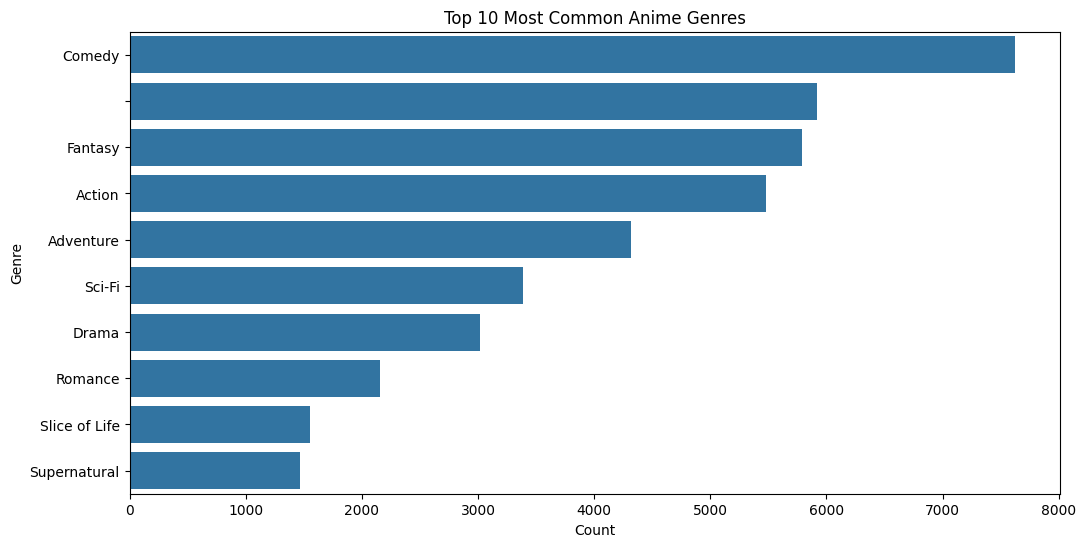

In [5]:
import pandas as pd
anime['genre'] = anime['genre'].fillna('')
from collections import Counter
all_genres = [g.strip() for genre in anime['genre'] for g in genre.split(',')]
genre_counts = pd.Series(Counter(all_genres)).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values[:10], y=genre_counts.index[:10])
plt.title("Top 10 Most Common Anime Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

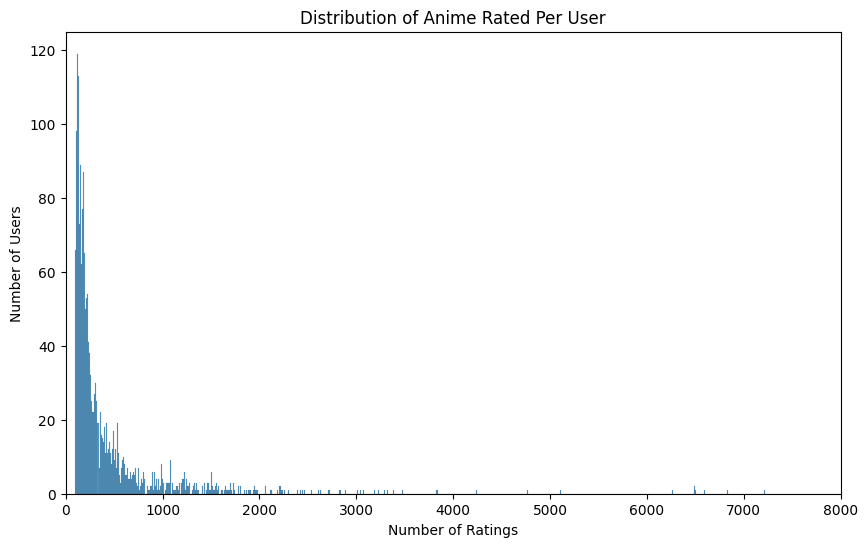

In [6]:
user_counts = ratings['user_id'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(user_counts, bins=1000)
plt.title("Distribution of Anime Rated Per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.xlim(0, 8000)
plt.show()

In [7]:
# Missing values
missing_ratings = ratings.isnull().sum()
print("\nMissing values in ratings:\n", missing_ratings)

missing_anime = anime.isnull().sum()
print("\nMissing values in anime:\n", missing_anime)


Missing values in ratings:
 user_id              0
anime_id             0
score            72514
status               0
episodes_seen     5240
liked                0
dtype: int64

Missing values in anime:
 anime_id              0
name                  0
title_english     15250
title_japanese      152
type                 67
episodes            557
rating            10040
rank               5028
popularity            0
members               0
status                0
source                0
duration              0
aired_from          843
aired_to          16934
genre                 0
studio            11535
synopsis           4837
dtype: int64


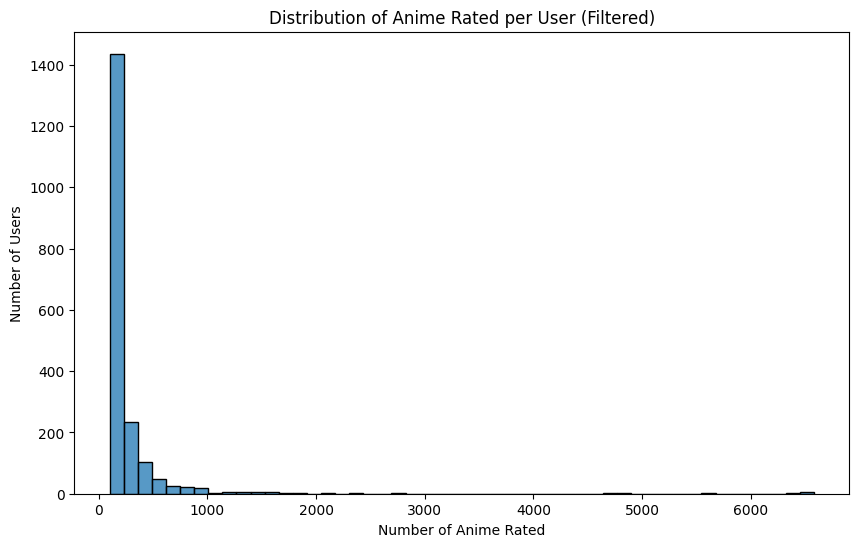

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(user_anime.sum(axis=1), bins=50)
plt.title("Distribution of Anime Rated per User (Filtered)")
plt.xlabel("Number of Anime Rated")
plt.ylabel("Number of Users")
plt.show()



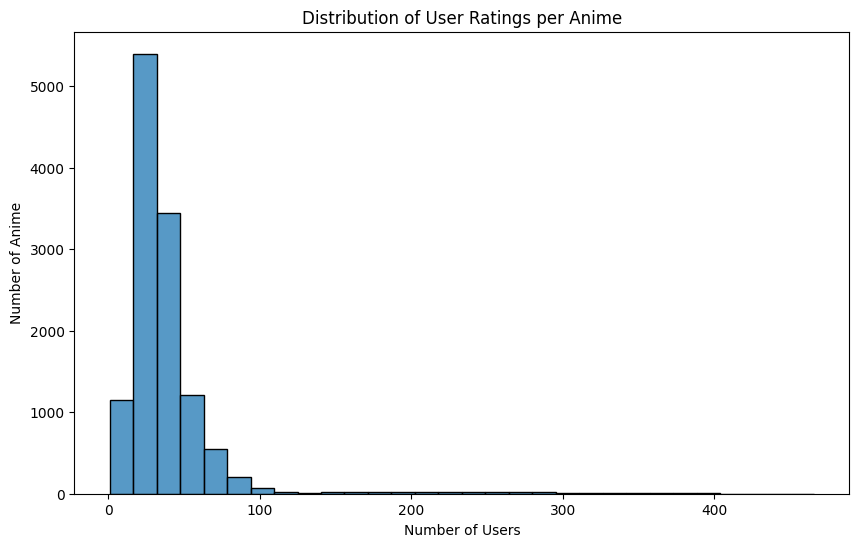

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(user_anime.sum(axis=0), bins=30)
plt.title("Distribution of User Ratings per Anime")
plt.xlabel("Number of Users")
plt.ylabel("Number of Anime")
plt.show()

Test split stats:
 count    1922.00000
mean       24.57128
std        43.25520
min        10.00000
25%        11.00000
50%        15.00000
75%        23.00000
max       658.00000
dtype: float64


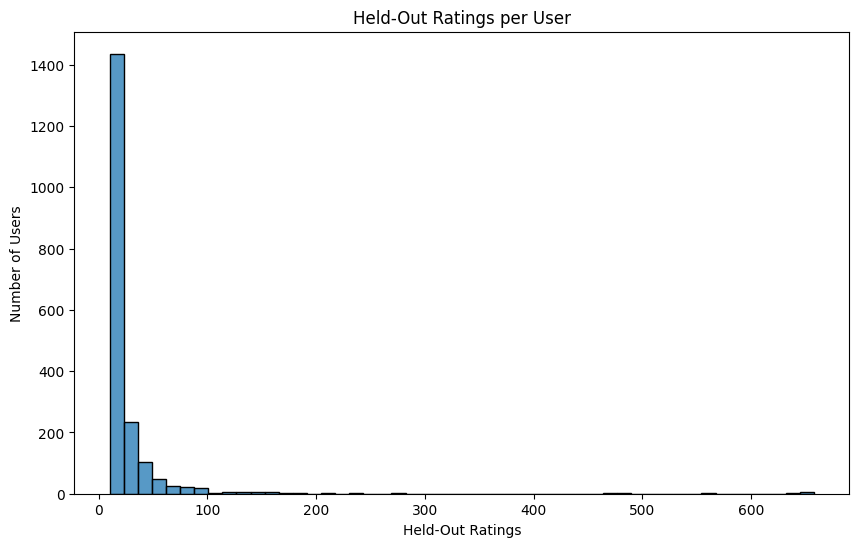

In [10]:
from src.utils import make_train_test_split
train, test = make_train_test_split(user_anime, holdout_ratio=data_config["holdout_ratio"])
held_out_counts = test.sum(axis=1)
print("Test split stats:\n", pd.Series(held_out_counts).describe())

plt.figure(figsize=(10, 6))
sns.histplot(held_out_counts, bins=50)
plt.title("Held-Out Ratings per User")
plt.xlabel("Held-Out Ratings")
plt.ylabel("Number of Users")
plt.show()

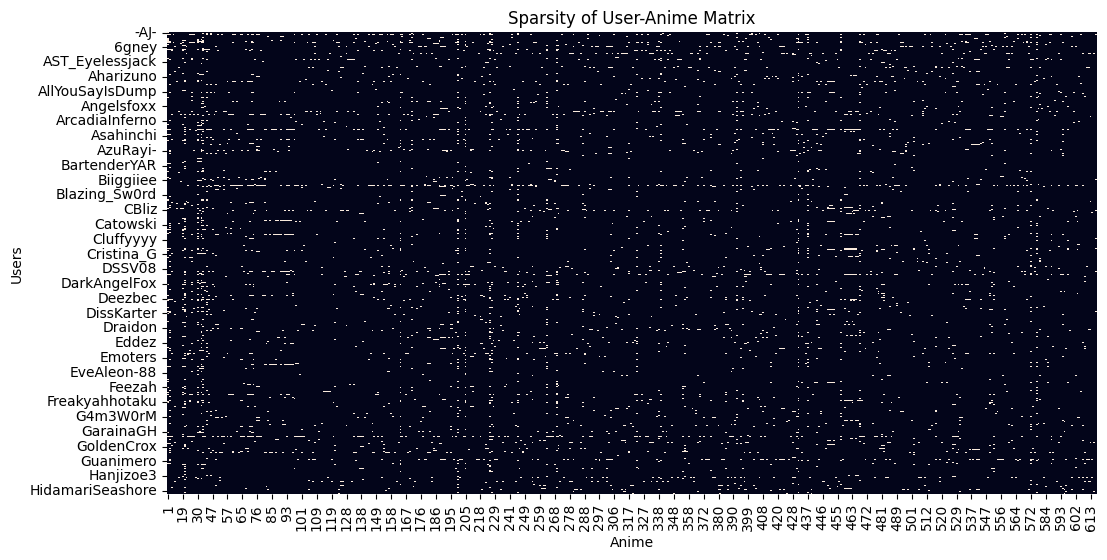

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(user_anime.iloc[:500, :500].astype(int), cbar=False)
plt.title("Sparsity of User-Anime Matrix")
plt.xlabel("Anime")
plt.ylabel("Users")
plt.show()